# Taller 3 MLOps - Data Science Salaries 2023
## Fase 4: Evaluación

### Universidad EIA
Evaluación final y selección del mejor modelo

## 1. IMPORTAR LIBRERÍAS

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. CARGAR DATOS Y MODELOS

In [13]:
# Cargar datos de test
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.flatten()

# Cargar modelos
lr_model = joblib.load('../models/linear_regression.pkl')
rf_model = joblib.load('../models/random_forest.pkl')
xgb_model = joblib.load('../models/xgboost.pkl')

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\n✓ Modelos cargados correctamente")

X_test shape: (751, 157)
y_test shape: (751,)

✓ Modelos cargados correctamente


## 3. REALIZAR PREDICCIONES

In [14]:
# Predicciones
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

print("✓ Predicciones completadas")
print(f"\nEjemplos de predicciones (primeras 5):")
print(f"Linear Regression: {y_pred_lr[:5]}")
print(f"Random Forest:     {y_pred_rf[:5]}")
print(f"XGBoost:           {y_pred_xgb[:5]}")
print(f"Valores reales:    {y_test[:5]}")

✓ Predicciones completadas

Ejemplos de predicciones (primeras 5):
Linear Regression: [195456. 130624. 159168. 192960. 110272.]
Random Forest:     [211401.4683681  119543.06042551 159127.59494814 187381.61728334
  69086.27968768]
XGBoost:           [203950.27 125363.18 160407.95 187808.78 125336.51]
Valores reales:    [168000 179975 144000 222200 230000]


## 4. CALCULAR MÉTRICAS

In [15]:
# Función para calcular métricas
def calculate_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name}:")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE:  ${mae:,.2f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

print("\n" + "="*70)
print("MÉTRICAS DE EVALUACIÓN EN TEST SET")
print("="*70)

metrics_lr = calculate_metrics(y_test, y_pred_lr, "Linear Regression")
metrics_rf = calculate_metrics(y_test, y_pred_rf, "Random Forest")
metrics_xgb = calculate_metrics(y_test, y_pred_xgb, "XGBoost")


MÉTRICAS DE EVALUACIÓN EN TEST SET

Linear Regression:
  RMSE: $212,976,740,365,298.91
  MAE:  $28,344,851,364,245.31
  R²:   -11489743331679817728.0000

Random Forest:
  RMSE: $262,833.26
  MAE:  $72,437.87
  R²:   -16.4987

XGBoost:
  RMSE: $48,872.54
  MAE:  $37,010.56
  R²:   0.3950


## 5. CREAR TABLA COMPARATIVA

In [16]:
# Tabla de comparación
comparison = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [metrics_lr['RMSE'], metrics_rf['RMSE'], metrics_xgb['RMSE']],
    'MAE': [metrics_lr['MAE'], metrics_rf['MAE'], metrics_xgb['MAE']],
    'R²': [metrics_lr['R2'], metrics_rf['R2'], metrics_xgb['R2']]
})

# Ordenar por RMSE (menor es mejor)
comparison = comparison.sort_values('RMSE').reset_index(drop=True)

print("\n" + "="*70)
print("TABLA COMPARATIVA (Ordenada por RMSE - Menor es mejor)")
print("="*70)
print(comparison.to_string(index=True))

# Guardar tabla
comparison.to_csv('../data/evaluation_results.csv', index=False)
print("\n✓ Resultados guardados en ../data/evaluation_results.csv")


TABLA COMPARATIVA (Ordenada por RMSE - Menor es mejor)
              Modelo          RMSE           MAE            R²
0            XGBoost  4.887254e+04  3.701056e+04  3.949716e-01
1      Random Forest  2.628333e+05  7.243787e+04 -1.649873e+01
2  Linear Regression  2.129767e+14  2.834485e+13 -1.148974e+19

✓ Resultados guardados en ../data/evaluation_results.csv


## 6. SELECCIONAR MEJOR MODELO

In [17]:
# Seleccionar mejor modelo (RMSE más bajo)
best_model_idx = comparison['RMSE'].idxmin()
best_model_name = comparison.loc[best_model_idx, 'Modelo']
best_rmse = comparison.loc[best_model_idx, 'RMSE']
best_mae = comparison.loc[best_model_idx, 'MAE']
best_r2 = comparison.loc[best_model_idx, 'R²']  # ← CORRECTO

print("\n" + "="*70)
print("🏆 MEJOR MODELO SELECCIONADO")
print("="*70)

print(f"""
Modelo: {best_model_name}

Métricas:
  RMSE: ${best_rmse:,.2f}
  MAE:  ${best_mae:,.2f}
  R²:   {best_r2:.4f}

Interpretación:
  - El modelo predice salarios con un error promedio de ${best_mae:,.2f}
  - Explica el {best_r2*100:.2f}% de la varianza en los salarios
  - RMSE (métrica prioritaria): ${best_rmse:,.2f}
""")

print("="*70)



🏆 MEJOR MODELO SELECCIONADO

Modelo: XGBoost

Métricas:
  RMSE: $48,872.54
  MAE:  $37,010.56
  R²:   0.3950

Interpretación:
  - El modelo predice salarios con un error promedio de $37,010.56
  - Explica el 39.50% de la varianza en los salarios
  - RMSE (métrica prioritaria): $48,872.54



## 7. ANÁLISIS DE RESIDUOS

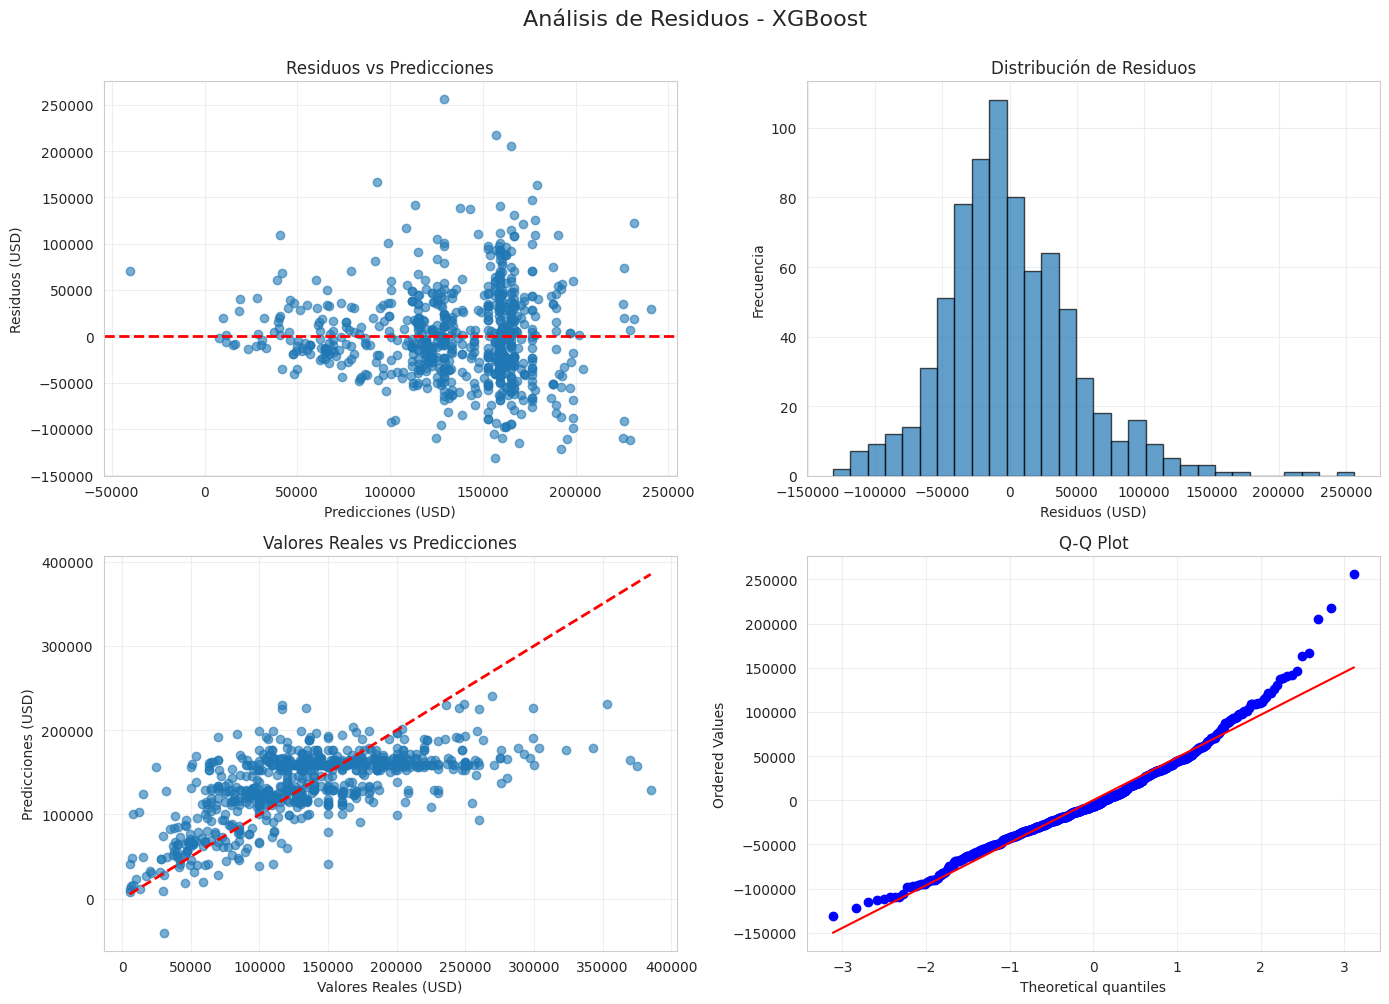

✓ Gráficos de residuos guardados en ../data/residual_analysis.png


In [18]:
# Obtener predicciones del mejor modelo
if best_model_name == 'Linear Regression':
    y_pred_best = y_pred_lr
elif best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf
else:
    y_pred_best = y_pred_xgb

# Calcular residuos
residuals = y_test - y_pred_best

# Visualizar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Análisis de Residuos - {best_model_name}', fontsize=16, y=1.00)

# Residuos vs Predicciones
axes[0, 0].scatter(y_pred_best, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicciones (USD)')
axes[0, 0].set_ylabel('Residuos (USD)')
axes[0, 0].set_title('Residuos vs Predicciones')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Residuos (USD)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Residuos')
axes[0, 1].grid(True, alpha=0.3)

# Valores reales vs Predicciones
axes[1, 0].scatter(y_test, y_pred_best, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Valores Reales (USD)')
axes[1, 0].set_ylabel('Predicciones (USD)')
axes[1, 0].set_title('Valores Reales vs Predicciones')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/residual_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

print("✓ Gráficos de residuos guardados en ../data/residual_analysis.png")

## 8. GUARDAR MEJOR MODELO PARA DESPLIEGUE

In [19]:
# Guardar el mejor modelo con nombre estándar
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
else:
    best_model = xgb_model

# Guardar como 'best_model.pkl' para usar en despliegue
joblib.dump(best_model, '../models/best_model.pkl')

# Guardar información del mejor modelo
best_model_info = {
    'model_name': best_model_name,
    'rmse': float(best_rmse),
    'mae': float(best_mae),
    'r2': float(best_r2)
}

import json
with open('../models/best_model_info.json', 'w') as f:
    json.dump(best_model_info, f, indent=4)

print(f"✓ Mejor modelo guardado como: ../models/best_model.pkl")
print(f"✓ Info del modelo guardada como: ../models/best_model_info.json")

✓ Mejor modelo guardado como: ../models/best_model.pkl
✓ Info del modelo guardada como: ../models/best_model_info.json


## 9. RESUMEN FINAL

In [20]:
print("\n" + "="*70)
print("RESUMEN - FASE 4: EVALUACIÓN")
print("="*70)

print(f"""
✓ MODELOS EVALUADOS: 3
  1. Linear Regression
  2. Random Forest
  3. XGBoost

✓ MÉTRICA PRIORITARIA: RMSE (Root Mean Squared Error)
  Razón: Penaliza más los errores grandes
  Importante en predicción de salarios

🏆 MEJOR MODELO: {best_model_name}
  RMSE: ${best_rmse:,.2f}
  MAE:  ${best_mae:,.2f}
  R²:   {best_r2:.4f}

✓ ANÁLISIS COMPLETADOS:
  ✓ Predicciones en test set
  ✓ Cálculo de métricas
  ✓ Análisis de residuos
  ✓ Gráficos de evaluación

✓ ARCHIVOS GENERADOS:
  ✓ best_model.pkl (para despliegue)
  ✓ best_model_info.json (metadata del modelo)
  ✓ evaluation_results.csv (tabla comparativa)
  ✓ residual_analysis.png (gráficos)

✓ PRÓXIMO PASO:
  Despliegue en EC2 con FastAPI
  - Crear app/main.py
  - Configurar systemd daemon
  - Probar con curl
""")

print("="*70)


RESUMEN - FASE 4: EVALUACIÓN

✓ MODELOS EVALUADOS: 3
  1. Linear Regression
  2. Random Forest
  3. XGBoost

✓ MÉTRICA PRIORITARIA: RMSE (Root Mean Squared Error)
  Razón: Penaliza más los errores grandes
  Importante en predicción de salarios

🏆 MEJOR MODELO: XGBoost
  RMSE: $48,872.54
  MAE:  $37,010.56
  R²:   0.3950

✓ ANÁLISIS COMPLETADOS:
  ✓ Predicciones en test set
  ✓ Cálculo de métricas
  ✓ Análisis de residuos
  ✓ Gráficos de evaluación

✓ ARCHIVOS GENERADOS:
  ✓ best_model.pkl (para despliegue)
  ✓ best_model_info.json (metadata del modelo)
  ✓ evaluation_results.csv (tabla comparativa)
  ✓ residual_analysis.png (gráficos)

✓ PRÓXIMO PASO:
  Despliegue en EC2 con FastAPI
  - Crear app/main.py
  - Configurar systemd daemon
  - Probar con curl

